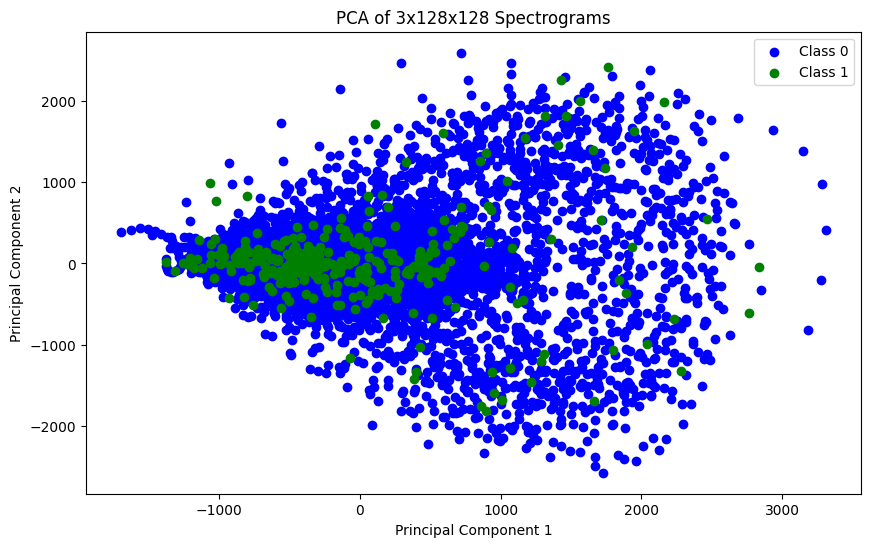

In [6]:
import glob
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paths to the tensors and labels
tensor_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.7_step_0.1/*_combined.pt')
label_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.7_step_0.1/*_label.pt')

# Load tensors and labels
tensors = [torch.load(path, weights_only=True).numpy() for path in tensor_paths]
labels = [torch.load(path, weights_only=True).item() for path in label_paths]

# Flatten the 3x128x128 spectrograms into 1D arrays
tensors_flattened = np.array([tensor.flatten() for tensor in tensors])

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
tensors_pca = pca.fit_transform(tensors_flattened)

# Convert labels to numpy array
labels = np.array(labels)

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(tensors_pca[labels == 0, 0], tensors_pca[labels == 0, 1], color='blue', label='Class 0')
plt.scatter(tensors_pca[labels == 1, 0], tensors_pca[labels == 1, 1], color='green', label='Class 1')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of 3x128x128 Spectrograms')
plt.legend()
plt.show()


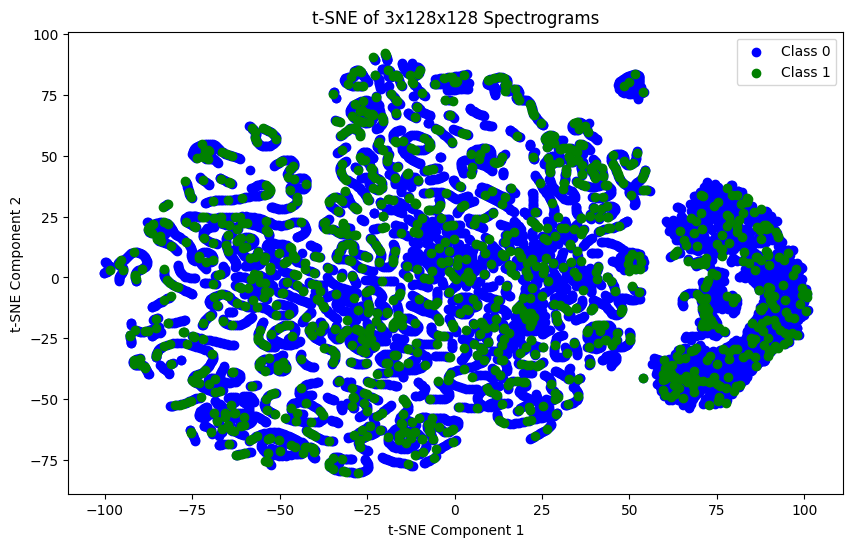

In [7]:
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Paths to the tensors and labels
tensor_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_combined.pt')
label_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_label.pt')

# Load tensors and labels
tensors = [torch.load(path, weights_only=True).numpy() for path in tensor_paths]
labels = [torch.load(path, weights_only=True).item() for path in label_paths]

# Flatten the 3x128x128 spectrograms into 1D arrays
tensors_flattened = np.array([tensor.flatten() for tensor in tensors])

# Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=42)
tensors_tsne = tsne.fit_transform(tensors_flattened)

# Convert labels to numpy array
labels = np.array(labels)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tensors_tsne[labels == 0, 0], tensors_tsne[labels == 0, 1], color='blue', label='Class 0')
plt.scatter(tensors_tsne[labels == 1, 0], tensors_tsne[labels == 1, 1], color='green', label='Class 1')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of 3x128x128 Spectrograms')
plt.legend()
plt.show()


/Users/yannbaglinbunod/miniconda3/envs/pytorch_mps_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/yannbaglinbunod/miniconda3/envs/pytorch_mps_env/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


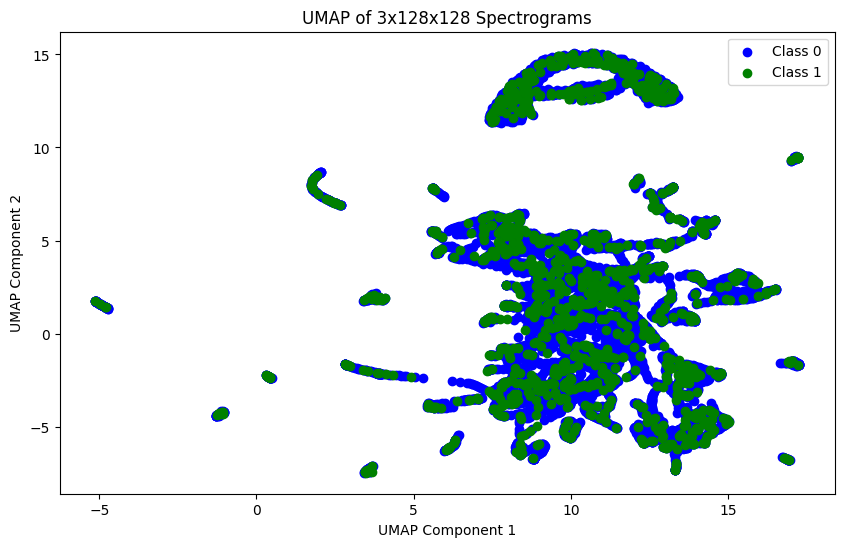

In [8]:
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import umap

# Paths to the tensors and labels
tensor_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_combined.pt')
label_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_label.pt')

# Load tensors and labels
tensors = [torch.load(path, weights_only=True).numpy() for path in tensor_paths]
labels = [torch.load(path, weights_only=True).item() for path in label_paths]

# Flatten the 3x128x128 spectrograms into 1D arrays
tensors_flattened = np.array([tensor.flatten() for tensor in tensors])

# Apply UMAP to reduce dimensionality to 2 components
umap_model = umap.UMAP(n_components=2, random_state=42)
tensors_umap = umap_model.fit_transform(tensors_flattened)

# Convert labels to numpy array
labels = np.array(labels)

# Plot the UMAP results
plt.figure(figsize=(10, 6))
plt.scatter(tensors_umap[labels == 0, 0], tensors_umap[labels == 0, 1], color='blue', label='Class 0')
plt.scatter(tensors_umap[labels == 1, 0], tensors_umap[labels == 1, 1], color='green', label='Class 1')

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of 3x128x128 Spectrograms')
plt.legend()
plt.show()


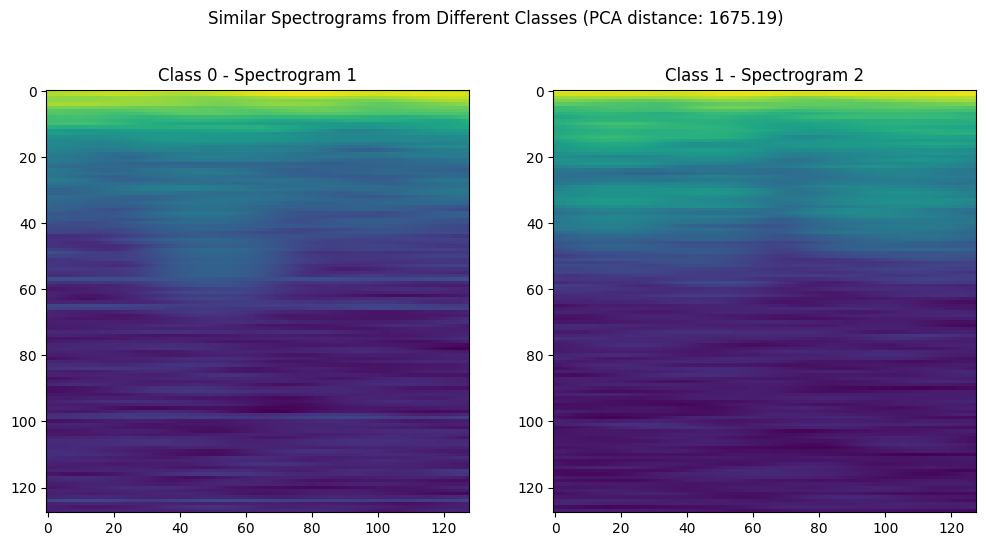

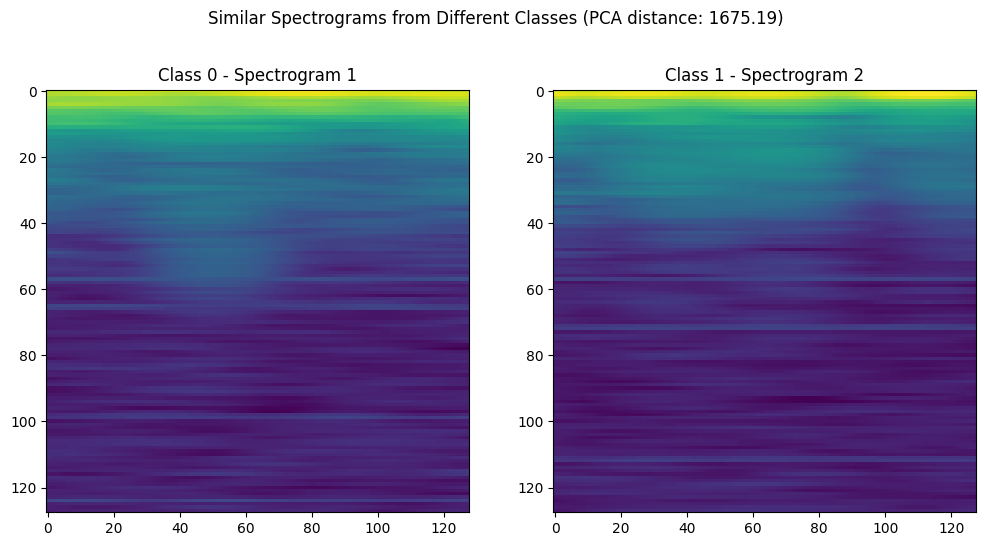

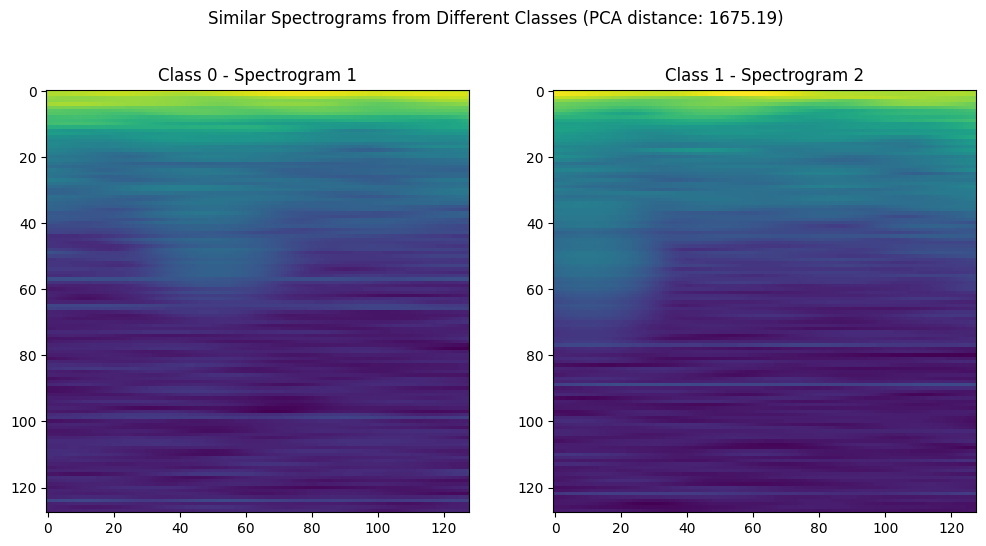

In [9]:
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paths to the tensors and labels
tensor_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_combined.pt')
label_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_label.pt')

# Load tensors and labels
tensors = [torch.load(path, weights_only=True).numpy() for path in tensor_paths]
labels = [torch.load(path, weights_only=True).item() for path in label_paths]

# Flatten the 3x128x128 spectrograms into 1D arrays
tensors_flattened = np.array([tensor.flatten() for tensor in tensors])

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
tensors_pca = pca.fit_transform(tensors_flattened)

# Convert labels to numpy array
labels = np.array(labels)

# Find indices of spectrograms that are close together but belong to different classes
similar_pairs = []
threshold = 50  # Adjust this value depending on how close you want the points to be

for i in range(len(tensors_pca)):
    for j in range(i + 1, len(tensors_pca)):
        if labels[i] != labels[j]:  # Different classes
            distance = np.linalg.norm(tensors_pca[i] - tensors_pca[j])
            if distance < threshold:
                similar_pairs.append((i, j))

# Plot the first few similar pairs of spectrograms
for pair in similar_pairs[:3]:  # Adjust the number of pairs to plot
    i, j = pair
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the first spectrogram
    axs[0].imshow(tensors[i][0], cmap='viridis')
    axs[0].set_title(f"Class {labels[i]} - Spectrogram 1")
    
    # Plot the second spectrogram
    axs[1].imshow(tensors[j][0], cmap='viridis')
    axs[1].set_title(f"Class {labels[j]} - Spectrogram 2")

    plt.suptitle(f"Similar Spectrograms from Different Classes (PCA distance: {distance:.2f})")
    plt.show()


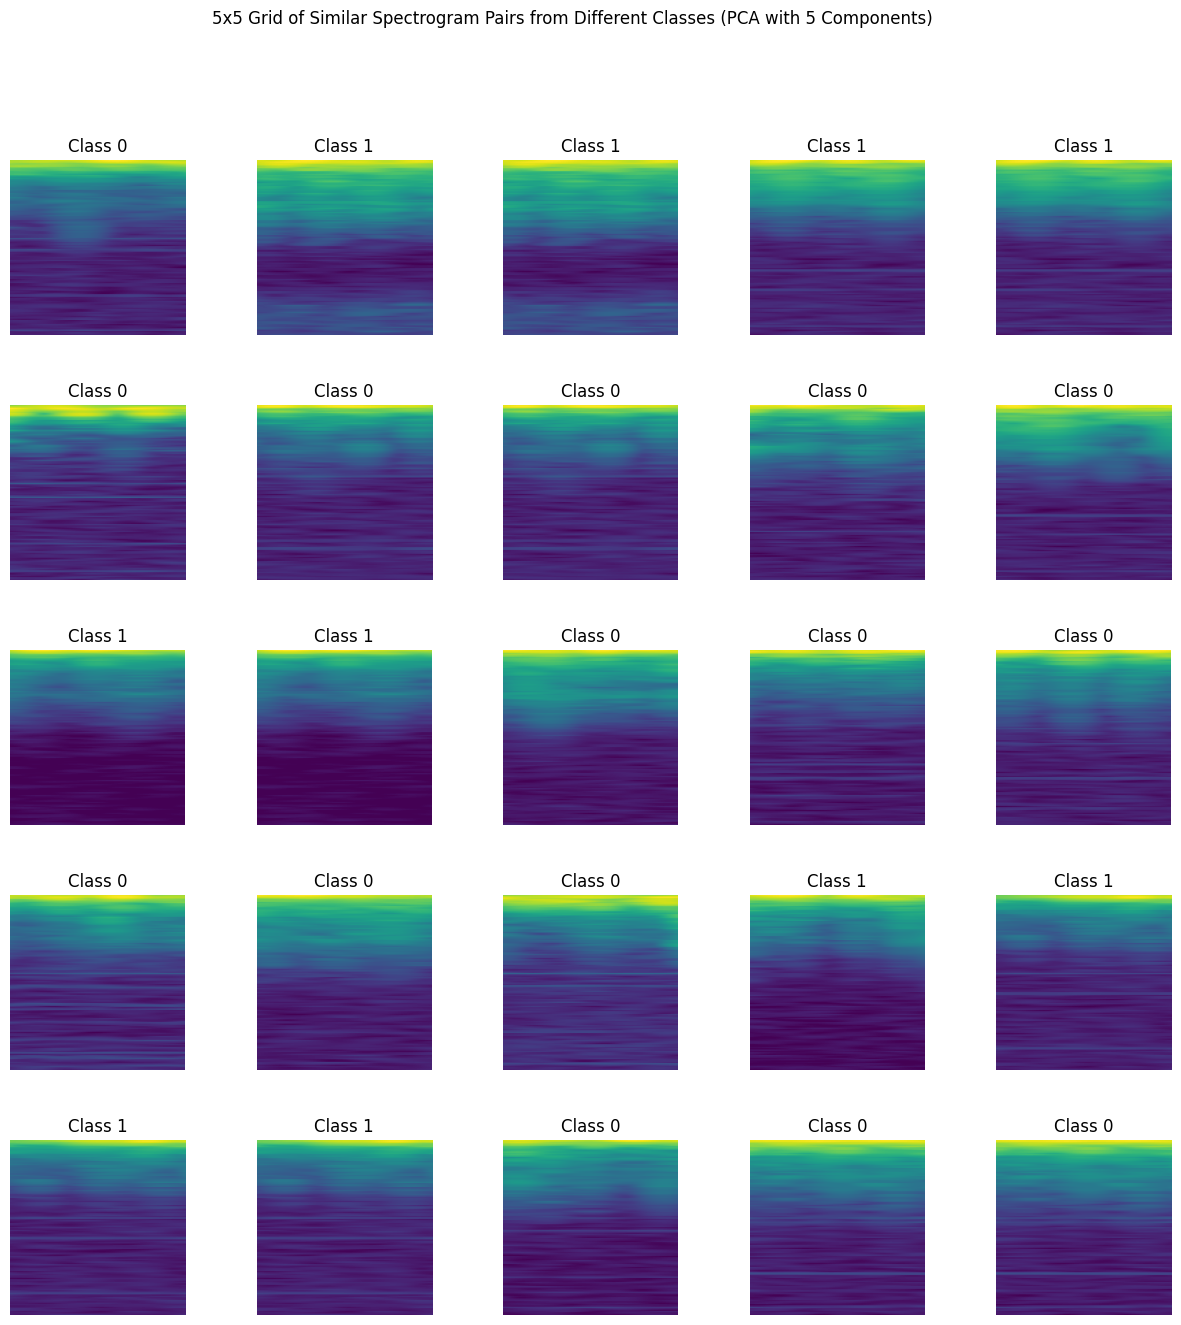

In [11]:
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paths to the tensors and labels
tensor_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_combined.pt')
label_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_label.pt')

# Load tensors and labels
tensors = [torch.load(path, weights_only=True).numpy() for path in tensor_paths]
labels = [torch.load(path, weights_only=True).item() for path in label_paths]

# Flatten the 3x128x128 spectrograms into 1D arrays
tensors_flattened = np.array([tensor.flatten() for tensor in tensors])

# Apply PCA to reduce dimensionality to 5 components
pca = PCA(n_components=5)
tensors_pca = pca.fit_transform(tensors_flattened)

# Convert labels to numpy array
labels = np.array(labels)

# Find indices of spectrograms that are close together but belong to different classes
similar_pairs = []
threshold = 50  # Adjust this value depending on how close you want the points to be

for i in range(len(tensors_pca)):
    for j in range(i + 1, len(tensors_pca)):
        if labels[i] != labels[j]:  # Different classes
            distance = np.linalg.norm(tensors_pca[i] - tensors_pca[j])
            if distance < threshold:
                similar_pairs.append((i, j))

# Plot 5x5 grid of similar pairs
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for idx, (i, j) in enumerate(similar_pairs[:25]):  # Take the first 25 similar pairs
    if idx >= 25:
        break
    
    # Plot the first spectrogram
    row = idx // 5
    col = idx % 5
    axs[row, col].imshow(tensors[i][0], cmap='viridis')
    axs[row, col].set_title(f"Class {labels[i]}")
    axs[row, col].axis('off')

plt.suptitle("5x5 Grid of Similar Spectrogram Pairs from Different Classes (PCA with 5 Components)")
plt.show()


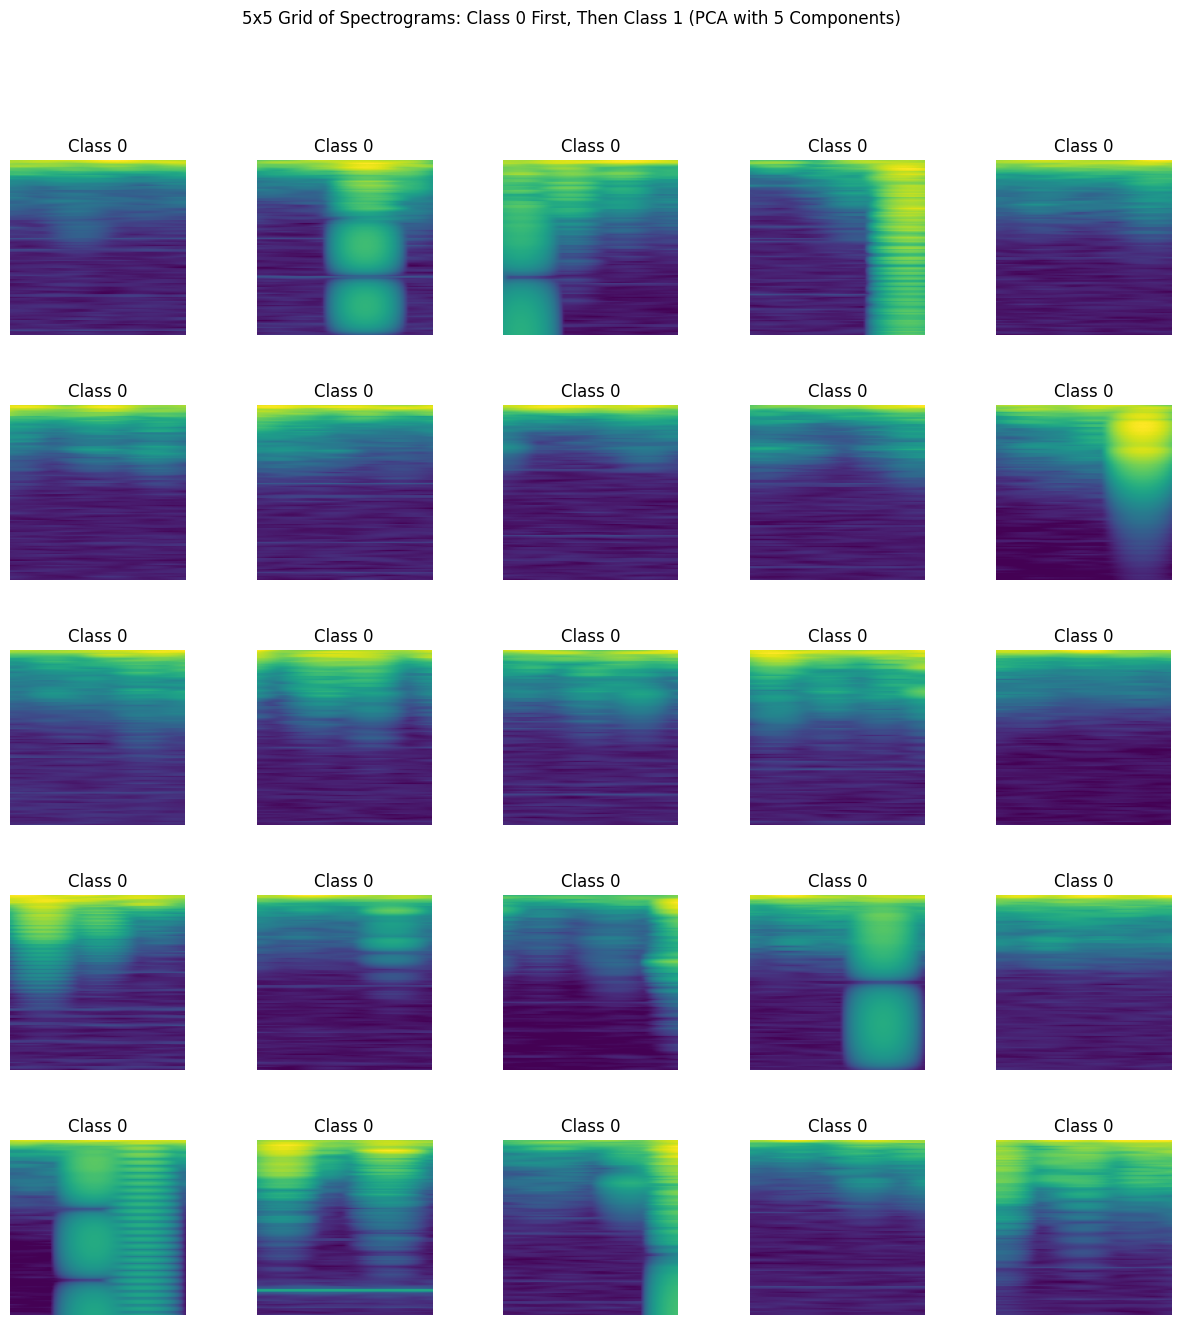

In [13]:
# Separate spectrograms by class
class_0_indices = [i for i, label in enumerate(labels) if label == 0]
class_1_indices = [i for i, label in enumerate(labels) if label == 1]

# Combine indices while keeping class 0 first
ordered_indices = class_0_indices + class_1_indices

# Plot 5x5 grid
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for idx in range(25):  # Adjust the number of plots to fit a 5x5 grid
    if idx >= len(ordered_indices):
        break

    i = ordered_indices[idx]

    # Plot the spectrogram
    row = idx // 5
    col = idx % 5
    axs[row, col].imshow(tensors[i][0], cmap='viridis')
    axs[row, col].set_title(f"Class {labels[i]}")
    axs[row, col].axis('off')

plt.suptitle("5x5 Grid of Spectrograms: Class 0 First, Then Class 1 (PCA with 5 Components)")
plt.show()


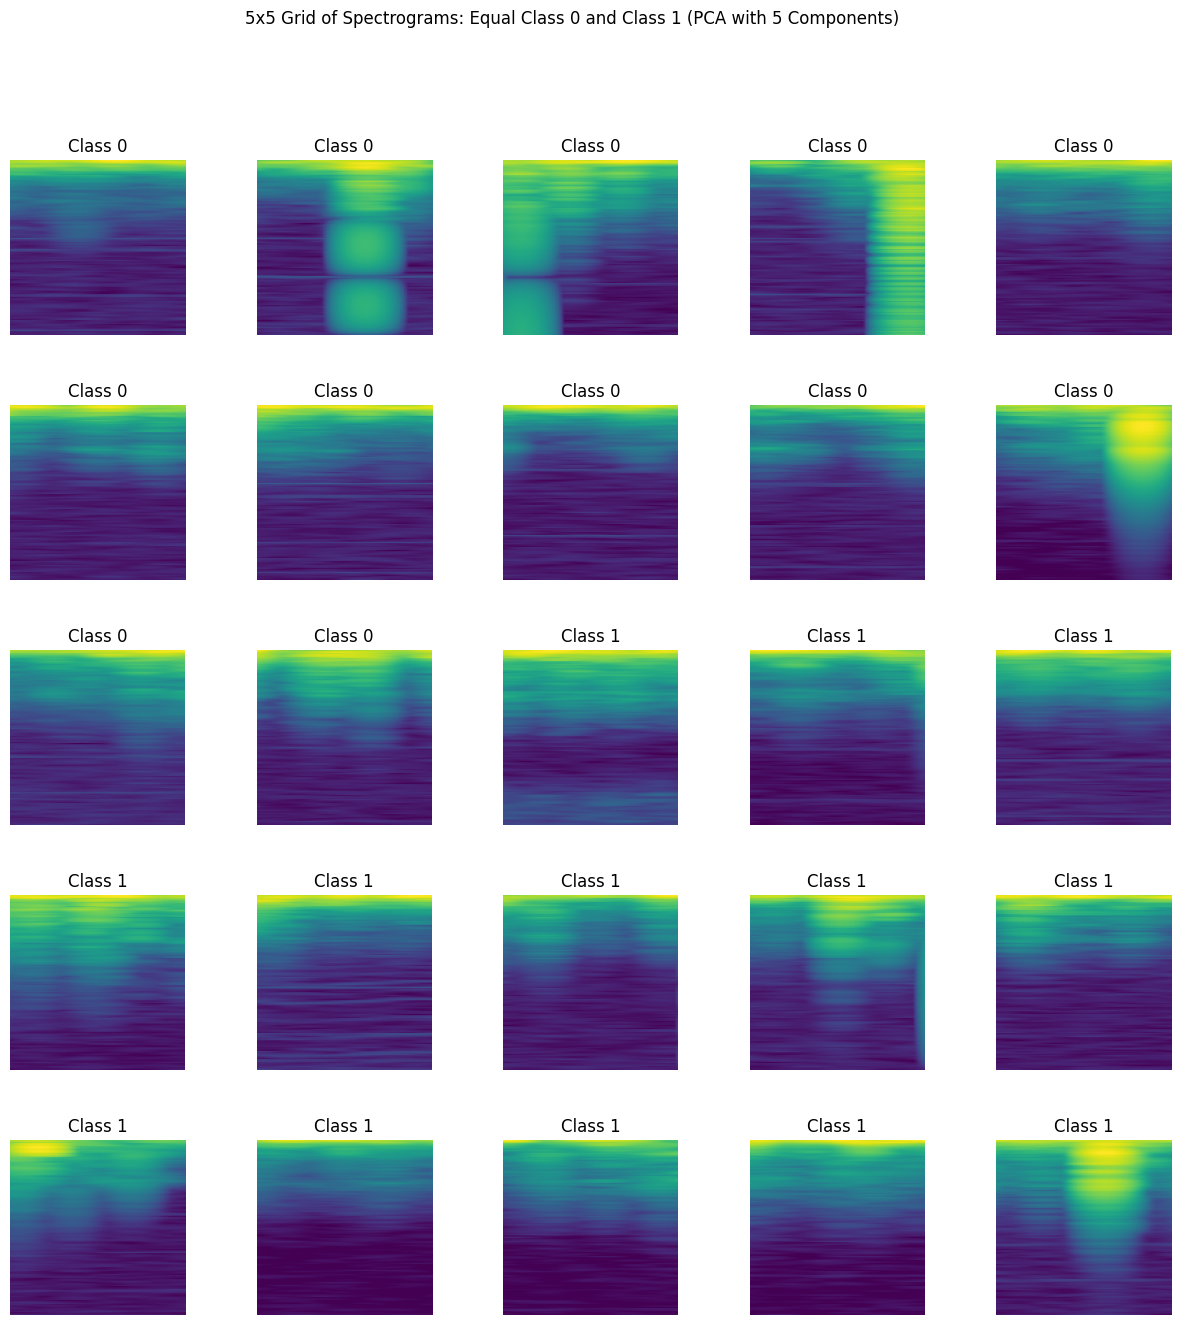

In [14]:
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paths to the tensors and labels
tensor_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_combined.pt')
label_paths = glob.glob('./FINISHED_PRODUCT_thresh_0.5_step_0.1/*_label.pt')

# Load tensors and labels
tensors = [torch.load(path, weights_only=True).numpy() for path in tensor_paths]
labels = [torch.load(path, weights_only=True).item() for path in label_paths]

# Flatten the 3x128x128 spectrograms into 1D arrays
tensors_flattened = np.array([tensor.flatten() for tensor in tensors])

# Apply PCA to reduce dimensionality to 5 components
pca = PCA(n_components=5)
tensors_pca = pca.fit_transform(tensors_flattened)

# Separate spectrograms by class
class_0_indices = [i for i, label in enumerate(labels) if label == 0]
class_1_indices = [i for i, label in enumerate(labels) if label == 1]

# Ensure we have an equal number of class 0 and class 1 spectrograms
num_to_plot = min(len(class_0_indices), len(class_1_indices), 12)

# Select 12 from class 0 and 13 from class 1 to plot
selected_indices = class_0_indices[:num_to_plot] + class_1_indices[:(25 - num_to_plot)]

# Plot 5x5 grid
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for idx in range(25):  # Adjust the number of plots to fit a 5x5 grid
    if idx >= len(selected_indices):
        break

    i = selected_indices[idx]

    # Plot the spectrogram
    row = idx // 5
    col = idx % 5
    axs[row, col].imshow(tensors[i][0], cmap='viridis')
    axs[row, col].set_title(f"Class {labels[i]}")
    axs[row, col].axis('off')

plt.suptitle("5x5 Grid of Spectrograms: Equal Class 0 and Class 1 (PCA with 5 Components)")
plt.show()


In [15]:
# Assuming you want to get the results for a specific directory
specific_directory = "./FINISHED_PRODUCT_thresh_0.5_step_0.1"  # Replace with your specific directory path

# Run the training and evaluation for the specific directory
train_loss, val_loss, test_loss, val_accuracy_0, val_accuracy_1, test_accuracy_0, test_accuracy_1 = train_and_evaluate(specific_directory, device)

# Print the results
print(f"Results for {specific_directory}:")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Validation Accuracy (0s): {val_accuracy_0:.4f}")
print(f"Validation Accuracy (1s): {val_accuracy_1:.4f}")
print(f"Test Accuracy (0s): {test_accuracy_0:.4f}")
print(f"Test Accuracy (1s): {test_accuracy_1:.4f}")


NameError: name 'train_and_evaluate' is not defined